# Determinant QMC data visualization

In [1]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as clrs
import os
import warnings
cwd = os.getcwd()
import seaborn as sns
sns.set()
sns.set_palette(sns.color_palette("Set1", n_colors=8, desat=1.))
sns.set_style("white")
sns.set_style({'grid.color': '0.95'})
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']

## Load simulation data

In [4]:
SAVE = False

system = '2d-MoS2-nanoribbon'
N = 150
BETA = 12
U = 16
MU = 5.3
NY = 5
NX = int(N / NY / 3)


simDir = '../data/' + system + '/N' + str(N)\
+ '-BETA' + str(BETA) + '-U' + str(U) + '-MU' + str(MU) + '-NY' + str(NY)
plotDir = '../plots/' + system + '/N' + str(N)\
+ '-BETA' + str(BETA) + '-U' + str(U) + '-MU' + str(MU) + '-NY' + str(NY)
if not os.path.exists(plotDir):
        os.makedirs(plotDir)

## $S_z$ Spin-spin correlations $\left\langle S_{i}^\alpha S_{j}^\beta \right\rangle$

In [5]:
SiaSjb = np.loadtxt(simDir + '/EqTimeSzCorrelations.csv', delimiter = ',', skiprows = 1)
#SiaSjbErr = np.loadtxt(simDir + '/EqTimeSzCorrelationsError.csv', delimiter = ',', skiprows = 1)
nOrb = 3

## Two relevant orbital resolved representations:

- Long range - 6 possibilities: $\left\langle S_{i}^{d_{z^2}} S_{j}^{d_{z^2}}\right\rangle$, $\left\langle S_{i}^{d_{xy}} S_{j}^{d_{xy}}\right\rangle$, $\left\langle S_{i}^{d_{x^2 - y^2}} S_{j}^{d_{x^2 - y^2}}\right\rangle$,
$\left\langle S_{i}^{d_{z^2}} S_{j}^{d_{xy}}\right\rangle$, $\left\langle S_{i}^{d_{z^2}} S_{j}^{d_{x^2 - y^2}}\right\rangle$, $\left\langle S_{i}^{d_{xy}} S_{j}^{d_{x^2 - y^2}}\right\rangle$

- On-site: $9 \times 9$ matrix : $\left\langle S_{i}^{\alpha} S_{i}^{\beta}\right\rangle$

### Long range

In [6]:
SiSjdz2 = np.zeros((NY, NX*NY))
SiSjdxy = np.zeros((NY, NX*NY))
SiSjdx2y2 = np.zeros((NY, NX*NY))

SiSjdz2xy = np.zeros((NY, NX*NY))
SiSjdz2x2y2 = np.zeros((NY, NX*NY))
SiSjdxyx2y2 = np.zeros((NY, NX*NY))

SiSjdxyz2 = np.zeros((NY, NX*NY))
SiSjdx2y2z2 = np.zeros((NY, NX*NY))
SiSjdx2y2xy = np.zeros((NY, NX*NY))

#SiSjdz2Err = np.zeros((NX*NY, NX*NY))
#SiSjdxyErr = np.zeros((NX*NY, NX*NY))
#SiSjdx2y2Err = np.zeros((NX*NY, NX*NY))

#SiSjdz2xyErr = np.zeros((NX*NY, NX*NY))
#SiSjdz2x2y2Err = np.zeros((NX*NY, NX*NY))
#SiSjdxyx2y2Err = np.zeros((NX*NY, NX*NY))

for i in range(NY):
    for j in range(NX*NY):
        SiSjdz2[i, j] = SiaSjb[3 * i, 3 * j]
        SiSjdxy[i, j] = SiaSjb[3 * i + 1, 3 * j + 1]
        SiSjdx2y2[i, j] = SiaSjb[3 * i + 2, 3 * j + 2]
        
        SiSjdz2xy[i, j] = SiaSjb[3 * i, 3 * j + 1]
        SiSjdz2x2y2[i, j] = SiaSjb[3 * i, 3 * j + 2]
        SiSjdxyx2y2[i, j] = SiaSjb[3 * i + 1, 3 * j + 2]
        
        SiSjdxyz2[i, j] = SiaSjb[3 * i + 1, 3 * j]
        SiSjdx2y2z2[i, j] = SiaSjb[3 * i + 2, 3 * j]
        SiSjdx2y2xy[i, j] = SiaSjb[3 * i + 2, 3 * j + 1]
        
#        SiSjdz2Err[i, j] = SiaSjbErr[3 * i, 3 * j]
#        SiSjdxyErr[i, j] = SiaSjbErr[3 * i + 1, 3 * j + 1]
#        SiSjdx2y2Err[i, j] = SiaSjbErr[3 * i + 2, 3 * j + 2]
        
#        SiSjdz2xyErr[i, j] = SiaSjbErr[3 * i, 3 * j]
#        SiSjdz2x2y2Err[i, j] = SiaSjbErr[3 * i + 1, 3 * j + 1]
#        SiSjdxyx2y2Err[i, j] = SiaSjbErr[3 * i + 2, 3 * j + 2]

SiSj = SiSjdz2 + SiSjdxy + SiSjdx2y2 + SiSjdz2xy + SiSjdz2x2y2 + SiSjdxyx2y2 + SiSjdxyz2 + SiSjdx2y2z2 + SiSjdx2y2xy
#SiSjErr = SiSjdz2Err + SiSjdxyErr + SiSjdx2y2Err + SiSjdz2xyErr + SiSjdz2x2y2Err + SiSjdxyx2y2Err

## $\left\langle S_{i} S_{j}\right\rangle$

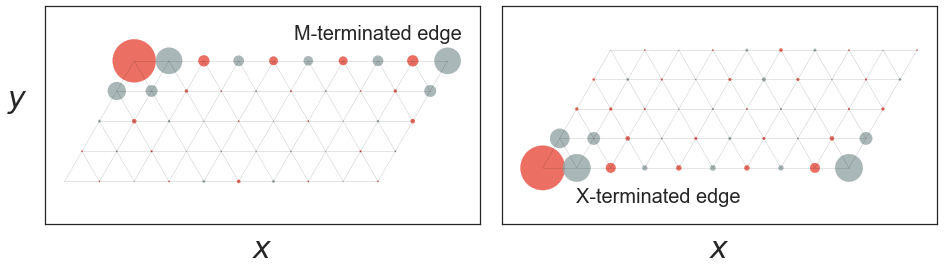

In [7]:
fig = plt.figure(1, figsize = (16, 4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
plt.subplots_adjust(wspace = 0.05)

dotscale = 1000
a1 = np.arange(NX)
a2 = np.arange(NY)
vs = np.zeros((NX * NY , 2))
clr = np.chararray((NX * NY), itemsize = 10)
v1 = np.array([1, 0])
v2 = np.array([1 / 2, np.sqrt(3) / 2])
for ax in [ax1, ax2]:
    #### PLOT THE LATTICE
    for i in range(NX - NY + 1):
        ax.plot([i, ( NY - 1 ) * 0.5 + i], [0, ( NY - 1 ) * np.sqrt(3) / 2],\
                    linewidth = 0.5, color = 'k', linestyle = '-', alpha = 0.2) 
        ax.plot([NY - 1 + i , ( NY - 1 ) * 0.5 + i], [0, ( NY - 1 ) * np.sqrt(3) / 2],\
                    linewidth = 0.5, color = 'k', linestyle = '-', alpha = 0.2) 
    for i in range(1, NY - 1):
        ax.plot([NY - 1 - i , ( NY - 1 - i ) * 0.5], [0, ( NY - 1 - i ) * np.sqrt(3) / 2],\
                        linewidth = 0.5, color = 'k', linestyle = '-', alpha = 0.2) 
        ax.plot([NX - 1 + 0.5 + 0.5 * i, NX - 0.5 * (NY - 1) + i], [np.sqrt(3) / 2 * (1 + i), np.sqrt(3) / 2 * (NY - 1)],\
                    linewidth = 0.5, color = 'k', linestyle = '-', alpha = 0.2) 
        ax.plot([i + NX - NY + 1, ( NY - 1 ) * 0.5 + i + NX - NY + 1], [0, ( NY - 1 ) * np.sqrt(3) / 2],\
                    linewidth = 0.5, color = 'k', linestyle = '-', alpha = 0.2) 
        ax.plot([NX - 1 + i / 2, i / 2], [i * np.sqrt(3) / 2, i * np.sqrt(3) / 2],\
                linewidth = 0.5, color = 'k', linestyle = '-', alpha = 0.2)
    ax.plot([NX - 1 + 0.5, NX - 0.5 * (NY - 1)], [np.sqrt(3) / 2, np.sqrt(3) / 2 * (NY - 1)],\
                linewidth = 0.5, color = 'k', linestyle = '-', alpha = 0.2) 
    ax.plot([NX - NY + 1, ( NY - 1 ) * 0.5 + NX - NY + 1], [0, ( NY - 1 ) * np.sqrt(3) / 2],\
                linewidth = 0.5, color = 'k', linestyle = '-', alpha = 0.2) 
    ax.plot([NX - 1, 0], [0, 0],\
            linewidth = 0.5, color = 'k', linestyle = '-', alpha = 0.2)  
    ax.plot([NX - 1 + (NY - 1) / 2, ( NY - 1 ) / 2], [( NY - 1 ) * np.sqrt(3) / 2, ( NY - 1 ) * np.sqrt(3) / 2],\
                linewidth = 0.5, color = 'k', linestyle = '-', alpha = 0.2) 
    ####

ref_row = NY - 1
for j in range(NY): 
    for i in range(NX):
        vs[NX * j + i, :] =\
        a1[i] * v1 + a2[j] * v2 
        if (SiSj[ref_row, NX*j + i]) > 0:
            clr[NX * j + i] = "#e74c3c"
        else :
            clr[NX * j + i] = "#95a5a6"
ax1.scatter(vs[:, 0], vs[:, 1], s = dotscale * abs(SiSj[ref_row, :]) ,\
           c = clr.decode('UTF-8'), alpha = 0.8, edgecolors = None)
ax1.plot([], [], label = 'M-terminated edge', linewidth = 0)

ref_row = 0
for j in range(NY): 
    for i in range(NX):
        vs[NX * j + i, :] =\
        a1[i] * v1 + a2[j] * v2 
        if (SiSj[ref_row, NX*j + i]) > 0:
            clr[NX * j + i] = "#e74c3c"
        else :
            clr[NX * j + i] = "#95a5a6"
ax2.scatter(vs[:, 0], vs[:, 1], s = dotscale * abs(SiSj[ref_row, :]) ,\
           c = clr.decode('UTF-8'), alpha = 0.8, edgecolors = None)
ax2.plot([], [], label = 'X-terminated edge', linewidth = 0)

ax1.set_ylabel(r'$y$', fontsize = 30, rotation = 0, labelpad = 20)
for ax in [ax1, ax2]:
    ax.axis('equal')
    ax.set_xlabel(r'$x$', fontsize = 30)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.legend(fontsize = 20)

if SAVE == True:
    plt.savefig(plotDir + '/S0Sr.png', dpi = 300)

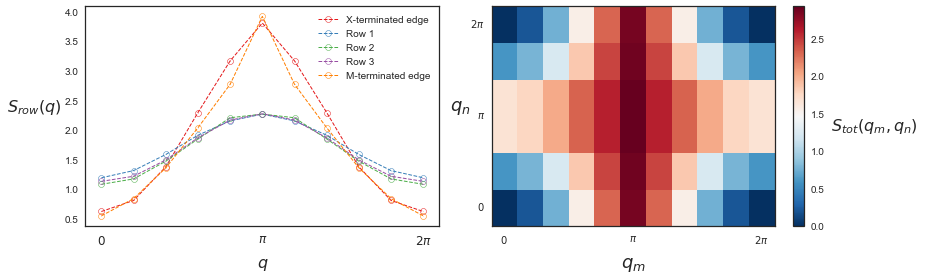

In [8]:
fig = plt.figure(1, figsize = (13, 4))
ax = fig.add_subplot(121)
axTot = fig.add_subplot(122)

for ref_row in np.arange(NY):
    Sq = np.zeros(NX + 1)
    for q in range(NX + 1):
        for i in range(NX):
            Sq[q] += SiSj[ref_row, ref_row * NX + i] * np.cos((2 * np.pi / NX * q) * i )
    if ref_row == 0:
        ax.plot(np.arange(0, 2* np.pi + np.pi / NX, 2 * np.pi / NX),\
                 Sq, marker = 'o', markersize = 0.5, markeredgewidth = 6,\
                linewidth = 1, linestyle = '--', label = 'X-terminated edge')
    elif ref_row == NY - 1:
        ax.plot(np.arange(0, 2* np.pi + np.pi / NX, 2 * np.pi / NX),\
                 Sq, marker = 'o', markersize = 0.5, markeredgewidth = 6,\
                linewidth = 1, linestyle = '--', label = 'M-terminated edge')
        np.savetxt("Sq-" + system + '-N' + str(N)\
        + '-BETA' + str(BETA) + '-U' + str(U) + '-MU' + str(MU) + '-NY' + str(NY) + ".csv", Sq)
    else:
        ax.plot(np.arange(0, 2* np.pi + np.pi / NX, 2 * np.pi / NX),\
                     Sq, marker = 'o', markersize = 0.5, markeredgewidth = 6,\
                    linewidth = 1, linestyle = '--', label = 'Row ' + str(ref_row))
        

        
qMax = 2*np.pi
qsX = np.arange(0, qMax + 2 * qMax/NX, qMax/NX)
qsY = np.arange(0, qMax + 2 * qMax/NY, qMax/NY)
S = np.zeros((NX+2, NY+2))
dist = 0

for idxX, qx in enumerate(qsX):
    for idxY, qy in enumerate(qsY):
        for x in range(NX):
            for y in range(NY):
                for ref_row in range(NY):
                    S[idxX, idxY] += np.cos( x * qx + (y - ref_row) * qy )\
                                        * SiSj[ref_row, NX*y + x]

S /=  (NY)

ax.set_xlabel(r'$q$', fontsize = 16, labelpad = 10)
ax.set_ylabel(r'$S_{row}(q)$', rotation = 0, labelpad = 30, fontsize = 16)
ax.set_xticks([0, np.pi, 2 * np.pi])
ax.set_xticklabels([r"$0$" , r"$\pi $",  r"$2\pi$"], fontsize = 12)
ax.legend(loc = 1)

p = axTot.pcolor(qsX, qsY, S.T, cmap=cm.RdBu_r)
axTot.set_xlabel(r'$q_m$', labelpad = 10, fontsize = 18)
axTot.set_ylabel(r'$q_n$', rotation = 0, labelpad = 10, fontsize = 18)
cb = fig.colorbar(p)
offsetX = 0.3
axTot.set_xticks([0 + offsetX, np.pi + offsetX, np.pi * 2 + offsetX])
axTot.set_xticklabels([r"$0$", r"$\pi$" , r"$2\pi$"])
offsetY = 0.7
axTot.set_yticks([0 + offsetY, np.pi + offsetY, np.pi * 2 + offsetY])
axTot.set_yticklabels([r"$0$", r"$\pi$" , r"$2\pi$"])
cb.set_label(r'$S_{tot}(q_m, q_n)$', rotation = 0, labelpad = 50, fontsize = 16)
plt.tight_layout()
if SAVE == True:
    plt.savefig(plotDir + '/StructureFactorPerRow.png', dpi = 300)

## Longitudinal correlations along one of the edges

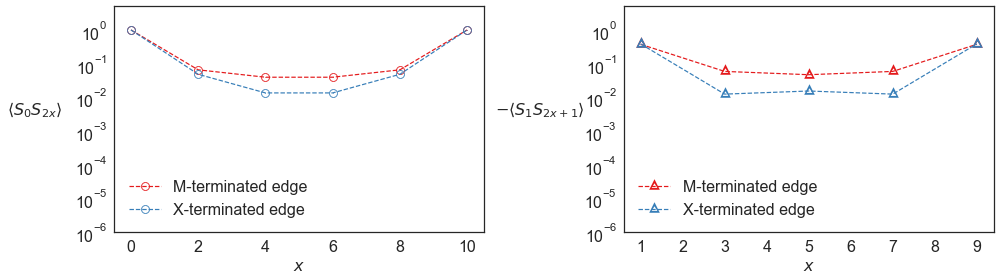

In [9]:
fig = plt.figure(1, figsize = (14, 4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
plt.subplots_adjust(hspace = 2, right = 1.5)

row_start = np.array([NY - 1, 0]) * NX

labels = ['M-terminated edge', 'X-terminated edge']

for idx, ref_point in enumerate(row_start):
    ref_row = int(ref_point / NX)
    ax1.plot(2 * np.arange(NX / 2 + 1), np.hstack([SiSj[ref_row, ref_point:ref_point + NX:2],\
                                               SiSj[ref_row, ref_point]]) / SiSj[ref_row, ref_point],\
                linewidth = 1.2, linestyle = '--', label = labels[idx],\
                marker = 'o', markersize = 0.8, markeredgewidth = 8)
    ax2.plot(2 * np.arange(NX / 2) + 1,\
                -SiSj[ref_row, ref_point + 1:ref_point + NX:2]\
                / SiSj[ref_row, ref_point],\
                linewidth = 1.2, linestyle = '--', label = labels[idx],\
                marker = '^', markersize = 0.05, markeredgewidth = 6.5)
for ax in [ax1, ax2]:
    ax.set_xlabel(r'$x$', fontsize = 16)
    ax.set_yscale('log')
    ax.set_ylim(1e-6, 5)
    ax.legend(loc = 0, fontsize = 16)
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(16) 
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(16) 
ax1.set_ylabel(r'$\left\langle S_{0} S_{2 x} \right\rangle$', rotation = 0, labelpad = 40, fontsize = 16)
ax2.set_ylabel(r'$-\left\langle S_{1} S_{2 x + 1} \right\rangle$', rotation = 0, labelpad = 45, fontsize = 16)
plt.tight_layout()
if SAVE == True:
    plt.savefig(plotDir + '/LongitudinalProfilePerRow.png', dpi = 300)
    
